<a href="https://colab.research.google.com/github/swapnil4549/Game-App-Reviews-Analysis/blob/main/GameAppMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df1 = pd.read_excel('/content/drive/MyDrive/sentiment approch/GameAppFinalDatasetForMl.xlsx')
df1

,content,is_socialism
0,Changing to 1 star. The first boss battle and ...,1
1,Constant disconnections during pvp battles whi...,1
2,Disappointed to know that there is no controll...,1
3,Good design but the map not helpful and some m...,1
4,"The game freezes for some seconds, it happens ...",1
...,...,...
995,Please make a solo server random teammates are...,0
996,How about a notice in game about features bein...,0
997,New controls suck I miss the old ones it was j...,0
998,Clearly there's a bug in this app. If you cann...,0


##1. Data Cleaning ##

In [ ]:
# missing values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content       1000 non-null   object
 1   is_socialism  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df1.isnull().sum()

content         0
is_socialism    0
dtype: int64

In [ ]:
# check for duplicate values
df1.duplicated().sum()

0

In [ ]:
df1.shape

(1000, 2)

##2. EDA

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df1['num_characters'] = df1['content'].apply(len)

In [ ]:
df1.head()

,content,is_socialism,num_characters
0,Changing to 1 star. The first boss battle and ...,1,159
1,Constant disconnections during pvp battles whi...,1,89
2,Disappointed to know that there is no controll...,1,291
3,Good design but the map not helpful and some m...,1,118
4,"The game freezes for some seconds, it happens ...",1,672


In [ ]:
# num of words
df1['num_words'] = df1['content'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df1.head()

,content,is_socialism,num_characters,num_words
0,Changing to 1 star. The first boss battle and ...,1,159,37
1,Constant disconnections during pvp battles whi...,1,89,15
2,Disappointed to know that there is no controll...,1,291,57
3,Good design but the map not helpful and some m...,1,118,23
4,"The game freezes for some seconds, it happens ...",1,672,139


In [ ]:
df1['num_sentences'] = df1['content'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df1.head()

,content,is_socialism,num_characters,num_words,num_sentences
0,Changing to 1 star. The first boss battle and ...,1,159,37,3
1,Constant disconnections during pvp battles whi...,1,89,15,2
2,Disappointed to know that there is no controll...,1,291,57,3
3,Good design but the map not helpful and some m...,1,118,23,2
4,"The game freezes for some seconds, it happens ...",1,672,139,7


In [ ]:
df1[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1000.00000,1000.000000,1000.000000
mean,268.94100,57.286000,3.436000
std,152.37953,32.636994,2.387384
min,19.00000,4.000000,1.000000
25%,133.75000,28.000000,1.000000
50%,261.00000,56.000000,3.000000
75%,405.00000,87.250000,5.000000
max,672.00000,139.000000,15.000000


In [ ]:
# socialism violation reviews relation.
df1[df1['is_socialism'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,499.000000,499.000000,499.000000
mean,265.194389,56.599198,3.292585
std,144.013081,30.726212,2.259866
min,20.000000,4.000000,1.000000
25%,141.000000,30.000000,1.000000
50%,251.000000,53.000000,3.000000
75%,386.500000,83.000000,5.000000
max,672.000000,139.000000,15.000000


In [ ]:
# non socialism violation reviews relation.
df1[df1['is_socialism'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,501.000000,501.000000,501.000000
mean,272.672655,57.970060,3.578842
std,160.336623,34.452186,2.502053
min,19.000000,4.000000,1.000000
25%,124.000000,26.000000,1.000000
50%,272.000000,58.000000,3.000000
75%,428.000000,90.000000,5.000000
max,504.000000,124.000000,13.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='num_characters', ylabel='Count'>

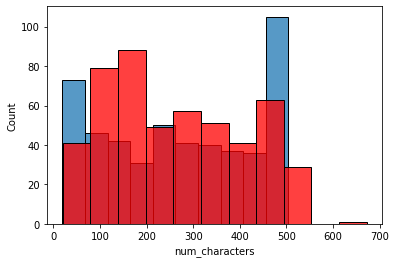

In [ ]:
# plt.figure(figsize=(12,6))
sns.histplot(df1[df1['is_socialism'] == 0]['num_characters'])
sns.histplot(df1[df1['is_socialism'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

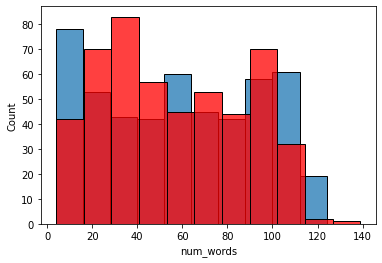

In [ ]:
# plt.figure(figsize=(12,6))
sns.histplot(df1[df1['is_socialism'] == 0]['num_words'])
sns.histplot(df1[df1['is_socialism'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

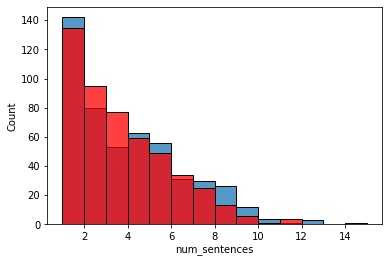

In [ ]:
# plt.figure(figsize=(12,6))
sns.histplot(df1[df1['is_socialism'] == 0]['num_sentences'])
sns.histplot(df1[df1['is_socialism'] == 1]['num_sentences'],color='red')

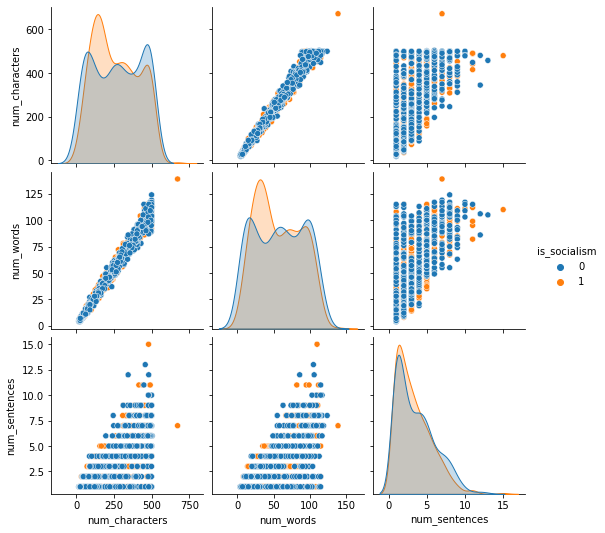

In [ ]:
sns.pairplot(df1,hue='is_socialism')

<Axes: >

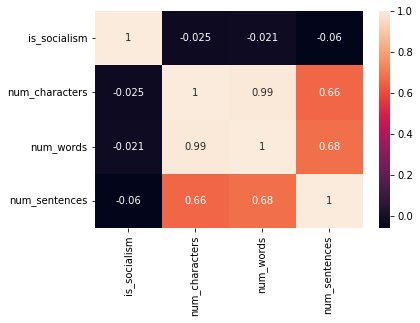

In [ ]:
# corelation between columns.. corelation co-efficient
sns.heatmap(df1.corr(),annot=True)

##3. Data Preprocessing
*   Lower case
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming
*   Emoji Removal


In [ ]:
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.stem.snowball import SnowballStemmer
snow_stemmer = SnowballStemmer("english")

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(snow_stemmer.stem(i))


    return " ".join(y)

In [ ]:
transform_text("I dont know what the hell is wrong with it now...it was running fine...but everytime i start a battle...it loads for some time and game just doesn't start...I have a stable internet connection. I even redownloaded this app but it doesn't work....please take a look at this. And this problem is solely with my account. When I logged out, I am able to play battles online.")

'dont know hell wrong run fine everytim start battl load time game start stabl internet connect even redownload app work pleas take look problem sole account log abl play battl onlin'

In [ ]:
df1['content'][11]

"I dont know what the hell is wrong with it now...it was running fine...but everytime i start a battle...it loads for some time and game just doesn't start...I have a stable internet connection. I even redownloaded this app but it doesn't work....please take a look at this. And this problem is solely with my account. When I logged out, I am able to play battles online."

In [ ]:
import re
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

remove_emoji("I dont know what the hell is wrong with it now...it was running fine...but everytime i start a battle...it loads for some time and game just doesn't start...I have a stable internet connection. I even redownloaded this app but it doesn't work....please take a look at this. And this problem is solely with my account. When I logged out, I am able to play battles online.")

"I dont know what the hell is wrong with it now...it was running fine...but everytime i start a battle...it loads for some time and game just doesn't start...I have a stable internet connection. I even redownloaded this app but it doesn't work....please take a look at this. And this problem is solely with my account. When I logged out, I am able to play battles online."

In [ ]:
df1['content'].apply(remove_emoji)

0      Changing to 1 star. The first boss battle and ...
1      Constant disconnections during pvp battles whi...
2      Disappointed to know that there is no controll...
3      Good design but the map not helpful and some m...
4      The game freezes for some seconds, it happens ...
                             ...                        
995    Please make a solo server random teammates are...
996    How about a notice in game about features bein...
997    New controls suck I miss the old ones it was j...
998    Clearly there's a bug in this app. If you cann...
999    Everytime I run out of moves and I try to watc...
Name: content, Length: 1000, dtype: object

In [ ]:
df1['preprocess_text'] = df1['content'].apply(transform_text)

In [ ]:
df1.head()

,content,is_socialism,num_characters,num_words,num_sentences,preprocess_text
0,Changing to 1 star. The first boss battle and ...,1,159,37,3,chang 1 star first boss battl main stori line ...
1,Constant disconnections during pvp battles whi...,1,89,15,2,constant disconnect pvp battl cost match would...
2,Disappointed to know that there is no controll...,1,291,57,3,disappoint know control support far prefer tou...
3,Good design but the map not helpful and some m...,1,118,23,2,good design map help miss starter point beginn...
4,"The game freezes for some seconds, it happens ...",1,672,139,7,game freez second happen most grenad thrown pl...


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
violation_wc = wc.generate(df1[df1['is_socialism'] == 1]['preprocess_text'].str.cat(sep=" "))

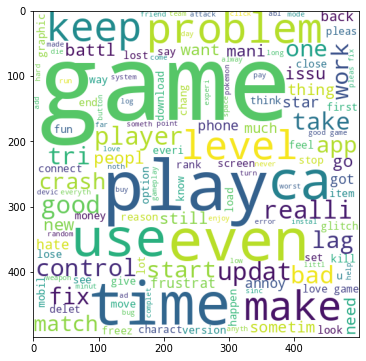

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(violation_wc)

In [ ]:
nonviolation_wc = wc.generate(df1[df1['is_socialism'] == 0]['preprocess_text'].str.cat(sep=" "))

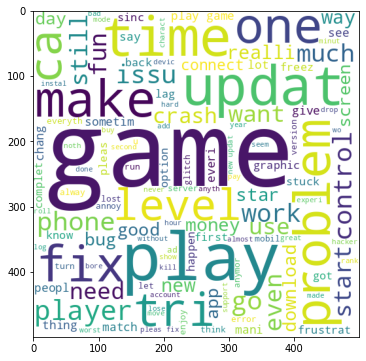

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(nonviolation_wc)

In [ ]:
socialism_corpus = []
for msg in df1[df1['is_socialism'] == 0]['preprocess_text'].tolist():
    for word in msg.split():
        socialism_corpus.append(word)

In [ ]:
len(socialism_corpus)

13016

In [ ]:
from collections import Counter
pd.DataFrame(Counter(socialism_corpus).most_common(30))

,0,1
0,game,685
1,play,221
2,get,157
3,time,150
4,updat,143
5,fix,120
6,problem,92
7,make,87
8,ca,87
9,one,81


##Modal Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df1['preprocess_text']).toarray()

In [ ]:
X.shape

(1000, 3000)

In [ ]:
y = df1['is_socialism'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.475
[[43 59]
 [46 52]]
0.46846846846846846


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.695
[[65 37]
 [24 74]]
0.6666666666666666


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.735
[[68 34]
 [19 79]]
0.6991150442477876


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
lrc1 = LogisticRegression(solver='liblinear', penalty='l1')
lrc1.fit(X_train,y_train)
y_pred4 = lrc1.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.775
[[84 18]
 [27 71]]
0.797752808988764


In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    Recall = recall_score(y_test,y_pred)
    F1_score = f1_score(y_test,y_pred)

    return accuracy,precision,Recall,F1_score

In [ ]:
train_classifier(lrc1,X_train,y_train,X_test,y_test)

(0.775, 0.797752808988764, 0.7244897959183674, 0.7593582887700534)

In [ ]:
accuracy_scores = []
precision_scores = []
Recall_scores = []
F1_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision,current_Recall,current_F1_score = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_Recall)
    print("F1_score - ",current_F1_score)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    Recall_scores.append(current_Recall)
    F1_scores.append(current_F1_score)

For  SVC
Accuracy -  0.75
Precision -  0.7727272727272727
Recall -  0.6938775510204082
F1_score -  0.7311827956989247
For  KN
Accuracy -  0.58
Precision -  0.5625
Recall -  0.6428571428571429
F1_score -  0.6000000000000001
For  NB
Accuracy -  0.695
Precision -  0.6666666666666666
Recall -  0.7551020408163265
F1_score -  0.7081339712918658
For  DT
Accuracy -  0.67
Precision -  0.7285714285714285
Recall -  0.5204081632653061
F1_score -  0.6071428571428572
For  LR
Accuracy -  0.775
Precision -  0.797752808988764
Recall -  0.7244897959183674
F1_score -  0.7593582887700534
For  RF
Accuracy -  0.75
Precision -  0.7448979591836735
Recall -  0.7448979591836735
F1_score -  0.7448979591836735
For  AdaBoost
Accuracy -  0.735
Precision -  0.7142857142857143
Recall -  0.7653061224489796
F1_score -  0.7389162561576355
For  BgC
Accuracy -  0.775
Precision -  0.7431192660550459
Recall -  0.826530612244898
F1_score -  0.782608695652174
For  ETC
Accuracy -  0.76
Precision -  0.7272727272727273
Recall - 

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':Recall_scores,'F1_scores':F1_scores}).sort_values('Accuracy',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision,Recall,F1_scores
4,LR,0.775,0.797753,0.724490,0.759358
7,BgC,0.775,0.743119,0.826531,0.782609
10,xgb,0.765,0.757576,0.765306,0.761421
8,ETC,0.760,0.727273,0.816327,0.769231
0,SVC,0.750,0.772727,0.693878,0.731183
5,RF,0.750,0.744898,0.744898,0.744898
9,GBDT,0.740,0.739583,0.724490,0.731959
6,AdaBoost,0.735,0.714286,0.765306,0.738916
2,NB,0.695,0.666667,0.755102,0.708134
3,DT,0.670,0.728571,0.520408,0.607143


In [ ]:
# model improvement
# tfidf change..

## Checking Voting Classifier

In [ ]:
bc = BaggingClassifier(n_estimators=50, random_state=2)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
xgb = XGBClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('BGC', bc), ('LR', lrc), ('xgb', xgb)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('BGC',
                              BaggingClassifier(n_estimators=50,
                                                random_state=2)),
                             ('LR',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            fea...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=2, ...))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.77
Precision 0.7407407407407407


In [ ]:
import pickle
pickle.dump(lrc1,open('modelnew.pkl','wb'))

## K Fold Cross Validation Technique

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=10):
      '''Function to perform 10 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)

      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [ ]:
decision_tree_result = cross_validation(lrc, X, y, 10)
print(decision_tree_result)

{'Training Accuracy scores': array([0.81666667, 0.81222222, 0.81444444, 0.82111111, 0.81222222,
       0.80888889, 0.81777778, 0.81333333, 0.82      , 0.80555556]), 'Mean Training Accuracy': 81.42222222222222, 'Training Precision scores': array([0.85148515, 0.83816425, 0.84390244, 0.84449761, 0.84653465,
       0.84197531, 0.84671533, 0.83855422, 0.85085575, 0.83454988]), 'Mean Training Precision': 0.8437234577911189, 'Training Recall scores': array([0.76614699, 0.77282851, 0.77060134, 0.78619154, 0.76169265,
       0.75946548, 0.77505568, 0.77505568, 0.77505568, 0.76222222]), 'Mean Training Recall': 0.7704315763424896, 'Training F1 scores': array([0.80656506, 0.80417149, 0.80558789, 0.81430219, 0.80187573,
       0.79859485, 0.80930233, 0.80555556, 0.81118881, 0.79674797]), 'Mean Training F1 Score': 0.8053891883916184, 'Validation Accuracy scores': array([0.82, 0.8 , 0.74, 0.75, 0.81, 0.78, 0.82, 0.79, 0.8 , 0.82]), 'Mean Validation Accuracy': 79.3, 'Validation Precision scores': arra

In [ ]:
from sklearn.model_selection import cross_validate
def cross_validation_modified(model, _X, _y, _cv=10):
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)

      return {#"Training Accuracy scores": results['train_accuracy'],
              # "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              # "Training Precision scores": results['train_precision'],
              # "Mean Training Precision": results['train_precision'].mean(),
              # "Training Recall scores": results['train_recall'],
              # "Mean Training Recall": results['train_recall'].mean(),
              # "Training F1 scores": results['train_f1'],
              # "Mean Training F1 Score": results['train_f1'].mean(),
              # "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean(),
              # "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              # "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              # "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [ ]:
decision_tree_result = cross_validation_modified(lrc, X, y, 10)
print(decision_tree_result)

{'Mean Validation Accuracy': 0.793, 'Mean Validation Precision': 0.829181482871574, 'Mean Validation Recall': 0.7414285714285714, 'Mean Validation F1 Score': 0.7805184605434727}


In [ ]:
results= cross_validation_modified(xgb, X, y, 10)
current_accuracy = results['Mean Validation Accuracy']
current_accuracy

0.7949999999999999

In [ ]:
accuracy_scores = []
precision_scores = []
Recall_scores = []
F1_scores = []

for name,clf in clfs.items():
    curr_result = []
    curr_result = cross_validation_modified(clf, X, y, 10)
    current_accuracy = curr_result['Mean Validation Accuracy']
    current_precision = curr_result['Mean Validation Precision']
    current_Recall = curr_result['Mean Validation Recall']
    current_F1_score = curr_result['Mean Validation F1 Score']

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_Recall)
    print("F1_score - ",current_F1_score)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    Recall_scores.append(current_Recall)
    F1_scores.append(current_F1_score)

For  SVC
Accuracy -  0.7270000000000001
Precision -  0.7493676026815562
Recall -  0.6833877551020409
F1_score -  0.7139730086305376
For  KN
Accuracy -  0.557
Precision -  0.5565703981538059
Recall -  0.5390204081632654
F1_score -  0.5465133508225688
For  NB
Accuracy -  0.671
Precision -  0.6590276262894585
Recall -  0.709265306122449
F1_score -  0.6819960743154373
For  DT
Accuracy -  0.6979999999999998
Precision -  0.8030982236154649
Recall -  0.5249387755102041
F1_score -  0.6323808738862378
For  LR
Accuracy -  0.793
Precision -  0.829181482871574
Recall -  0.7414285714285714
F1_score -  0.7805184605434727
For  RF
Accuracy -  0.774
Precision -  0.7796853310296377
Recall -  0.7655510204081633
F1_score -  0.7714282601747244
For  AdaBoost
Accuracy -  0.763
Precision -  0.7858975167389801
Recall -  0.7295510204081632
F1_score -  0.7536411237306503
For  BgC
Accuracy -  0.7870000000000001
Precision -  0.7780275634768941
Recall -  0.8055918367346939
F1_score -  0.7902455693112733
For  ETC
Ac

In [ ]:
validatedf = pd.DataFrame({'Algorithm':clfs.keys(),
                           'Mean Validation Accuracy':accuracy_scores,
                           'Mean Validation Precision':precision_scores,
                           'Mean Validation Recall':Recall_scores,
                           'Mean Validation F1 Score':F1_scores}).sort_values('Mean Validation Accuracy',ascending=False)

In [ ]:
validatedf

,Algorithm,Mean Validation Accuracy,Mean Validation Precision,Mean Validation Recall,Mean Validation F1 Score
10,xgb,0.795,0.801578,0.787510,0.792367
4,LR,0.793,0.829181,0.741429,0.780518
7,BgC,0.787,0.778028,0.805592,0.790246
9,GBDT,0.779,0.793370,0.757510,0.772973
8,ETC,0.778,0.758001,0.823510,0.787927
5,RF,0.774,0.779685,0.765551,0.771428
6,AdaBoost,0.763,0.785898,0.729551,0.753641
0,SVC,0.727,0.749368,0.683388,0.713973
3,DT,0.698,0.803098,0.524939,0.632381
2,NB,0.671,0.659028,0.709265,0.681996


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(lrc,open('model.pkl','wb'))